1.15.0


Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Colab uses GPU**

In [1]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# **Import Necessary Libraries**

In [2]:
import os
import time
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt

from keras_preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization 
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import RMSprop
from keras.applications import VGG19, ResNet50, InceptionV3,VGG16

print(tf.__version__)


1.15.0


Using TensorFlow backend.


# **Unzip the Dataset**

In [0]:
zip_ref = zipfile.ZipFile('drive/My Drive/Datasets/Flowers.zip', 'r')
zip_ref.extractall('Flower') # unzip directory
zip_ref.close()

# **Load Data and Create Data Frame**

In [6]:
flower_class = pd.read_csv('Flower/classlabels.txt', header = None, names=['Images','Class'])
flower_class

,Images,Class
0,JFT_00001.jpg,1
1,JFT_00002.jpg,1
2,JFT_00003.jpg,1
3,JFT_00004.jpg,1
4,JFT_00006.jpg,1
...,...,...
1474,JFT_01467.jpg,29
1475,JFT_01470.jpg,30
1476,JFT_01472.jpg,30
1477,JFT_01476.jpg,30


In [7]:
flower_class['N_Images']= flower_class['Images'].str.strip('JFT_0000').str.strip('.jpg')
flower_class

,Images,Class,N_Images
0,JFT_00001.jpg,1,1
1,JFT_00002.jpg,1,2
2,JFT_00003.jpg,1,3
3,JFT_00004.jpg,1,4
4,JFT_00006.jpg,1,6
...,...,...,...
1474,JFT_01467.jpg,29,1467
1475,JFT_01470.jpg,30,1470
1476,JFT_01472.jpg,30,1472
1477,JFT_01476.jpg,30,1476


# **Calculate the Baseline**

In [8]:
base_line = 100*flower_class['Class'].value_counts()/len(flower_class)
base_line

6     4.732928
28    4.597701
23    4.530088
13    4.462475
4     4.462475
2     4.394861
7     4.327248
18    4.259635
29    4.259635
20    4.124408
27    4.124408
24    4.056795
10    4.056795
25    3.786342
19    3.718729
14    3.651116
5     3.651116
22    3.313049
12    3.245436
9     3.110210
17    3.042596
3     2.772143
21    2.569304
11    2.434077
26    2.366464
8     1.893171
16    1.622718
15    0.878972
30    0.811359
1     0.743746
Name: Class, dtype: float64

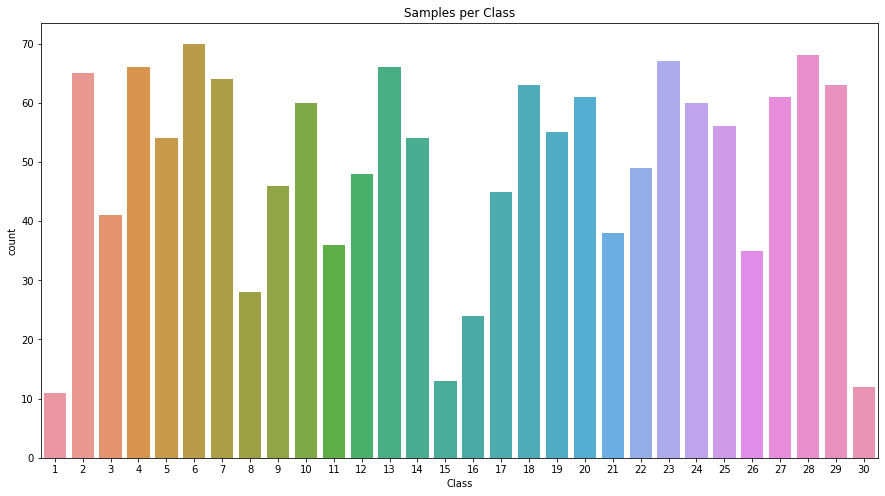

In [9]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Class',data=flower_class)
plt.title("Samples per Class")
plt.show()

In [10]:
train1 = pd.read_csv('Flower/tst1.txt',header= None,names=['N_Images'])
train1['N_Images'] = train1['N_Images'].apply(str)
train1df = flower_class.merge(train1, on= 'N_Images')
train1df['Class'] = train1df['Class'].apply(str)
train1df

,Images,Class,N_Images
0,JFT_00005.jpg,1,5
1,JFT_00007.jpg,1,7
2,JFT_00011.jpg,1,11
3,JFT_00012.jpg,2,12
4,JFT_00013.jpg,2,13
...,...,...,...
916,JFT_01467.jpg,29,1467
917,JFT_01470.jpg,30,1470
918,JFT_01472.jpg,30,1472
919,JFT_01476.jpg,30,1476


In [11]:
val1 = pd.read_csv('Flower/val1.txt',sep = ' ',header= None,names=['N_Images'])
val1['N_Images'] = val1['N_Images'].apply(str)
val1df = flower_class.merge(val1, on= 'N_Images')
val1df['Class'] = val1df['Class'].apply(str)
val1df

,Images,Class,N_Images
0,JFT_00001.jpg,1,1
1,JFT_00003.jpg,1,3
2,JFT_00006.jpg,1,6
3,JFT_00008.jpg,1,8
4,JFT_00018.jpg,2,18
...,...,...,...
274,JFT_01462.jpg,29,1462
275,JFT_01469.jpg,30,1469
276,JFT_01471.jpg,30,1471
277,JFT_01474.jpg,30,1474


In [12]:
test1 = pd.read_csv('Flower/trn1.txt',sep = ' ',header= None,names=['N_Images'])
test1['N_Images'] = test1['N_Images'].apply(str)
test1df = flower_class.merge(test1, on= 'N_Images')
test1df['Class'] = test1df['Class'].apply(str)
test1df

,Images,Class,N_Images
0,JFT_00002.jpg,1,2
1,JFT_00004.jpg,1,4
2,JFT_00009.jpg,1,9
3,JFT_00010.jpg,1,10
4,JFT_00021.jpg,2,21
...,...,...,...
274,JFT_01466.jpg,29,1466
275,JFT_01468.jpg,30,1468
276,JFT_01473.jpg,30,1473
277,JFT_01475.jpg,30,1475


In [13]:
print("Total Number of Images",flower_class.shape[0])
print("Number of Training Images", train1df.shape[0])
print("Number of Validation Images", val1df.shape[0])
print("Number of Training Images", test1df.shape[0])

Total Number of Images 1479
Number of Training Images 921
Number of Validation Images 279
Number of Training Images 279


# **Data Augmentation**

In [14]:
datagen=ImageDataGenerator(rescale=1./255.,
                           featurewise_center=False,
                           featurewise_std_normalization=False,
                           rotation_range=90,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True,
                           vertical_flip=True)

train1_generator=datagen.flow_from_dataframe(
dataframe=train1df,
directory="Flower/jpg/",
x_col="Images",
y_col="Class",
subset="training",
batch_size=128,
seed=42,
shuffle=True,
class_mode="categorical",
color_mode="rgb",
#target_size=(256,256))
target_size=(128,128))
print('Train generator created')


val1_generator=datagen.flow_from_dataframe(
dataframe=val1df,
directory="Flower/jpg/",
x_col="Images",
y_col="Class",
subset="training",
batch_size=128,
seed=42,
shuffle=True,
class_mode="categorical",
#target_size=(256,256))
target_size=(128,128))
print('Validation generator created')

test1_generator=datagen.flow_from_dataframe(
dataframe=test1df,
directory="Flower/jpg/",
x_col="Images",
y_col="Class",
subset="training",
#batch_size=128,
batch_size= 1,
color_mode="rgb",
seed=42,
shuffle=False,
#class_mode="sparse",
class_mode = None,
#target_size=(256,256))
target_size=(128,128))
print('Test generator created')

Found 921 validated image filenames belonging to 30 classes.
Train generator created
Found 279 validated image filenames belonging to 30 classes.
Validation generator created
Found 279 validated image filenames.
Test generator created


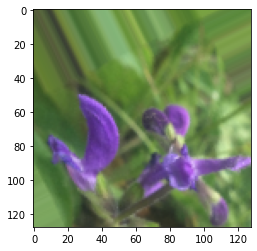

In [15]:
image, label = next(iter(train1_generator))
plt.imshow(image[0,:]);

# **Build the Model**

**VGG16** for fine tuning

In [0]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

In [20]:

for layer in vgg_conv.layers[:-4]:
  layer.trainable = False

# Check the trainable status of the individual layers

for layer in vgg_conv.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f52fd51cf98> False
<keras.layers.convolutional.Conv2D object at 0x7f52fd51c0f0> False
<keras.layers.convolutional.Conv2D object at 0x7f52fd51c438> False
<keras.layers.pooling.MaxPooling2D object at 0x7f52fb0aa128> False
<keras.layers.convolutional.Conv2D object at 0x7f52fb0acc50> False
<keras.layers.convolutional.Conv2D object at 0x7f52fb0b3b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7f52fb0b8710> False
<keras.layers.convolutional.Conv2D object at 0x7f52fa844940> False
<keras.layers.convolutional.Conv2D object at 0x7f52fa844f98> False
<keras.layers.convolutional.Conv2D object at 0x7f52fa8504e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f52fa8575f8> False
<keras.layers.convolutional.Conv2D object at 0x7f52fa864160> False
<keras.layers.convolutional.Conv2D object at 0x7f52fa864e48> False
<keras.layers.convolutional.Conv2D object at 0x7f52fa86beb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f52fa876518>

In [21]:
from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(30, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                30750     
Total params: 23,135,070
Trainable params: 15,499,806
Non-trainable params: 7,635,264
__________________________________________________

# **Compile the model**

In [22]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
#optimizers.RMSprop(lr=1e-4)

In [39]:
# Train the model
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)
EPOCHS = 300

history = model.fit_generator(
      train1_generator,validation_data = val1_generator, 
                   epochs=EPOCHS, callbacks=[early_stopping_monitor],
                   verbose=1)  


Epoch 1/300
8/8 [==============================] - 21s 3s/step - loss: 0.0855 - acc: 0.9822 - val_loss: 0.5952 - val_acc: 0.8996
Epoch 2/300
8/8 [==============================] - 20s 3s/step - loss: 0.0057 - acc: 0.9990 - val_loss: 0.4195 - val_acc: 0.9283
Epoch 3/300
8/8 [==============================] - 20s 3s/step - loss: 0.0158 - acc: 0.9990 - val_loss: 0.3287 - val_acc: 0.9319
Epoch 4/300
8/8 [==============================] - 20s 3s/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.5170 - val_acc: 0.9068
Epoch 5/300
8/8 [==============================] - 20s 3s/step - loss: 0.0205 - acc: 0.9941 - val_loss: 0.4562 - val_acc: 0.9211
Epoch 6/300
8/8 [==============================] - 20s 3s/step - loss: 0.0546 - acc: 0.9855 - val_loss: 0.2923 - val_acc: 0.9534
Epoch 7/300
8/8 [==============================] - 20s 3s/step - loss: 0.0044 - acc: 0.9990 - val_loss: 0.3823 - val_acc: 0.9355
Epoch 8/300
8/8 [==============================] - 20s 3s/step - loss: 0.0232 - acc: 0.9941 - val

In [0]:
model.save('Image_fine_tuning.h5')


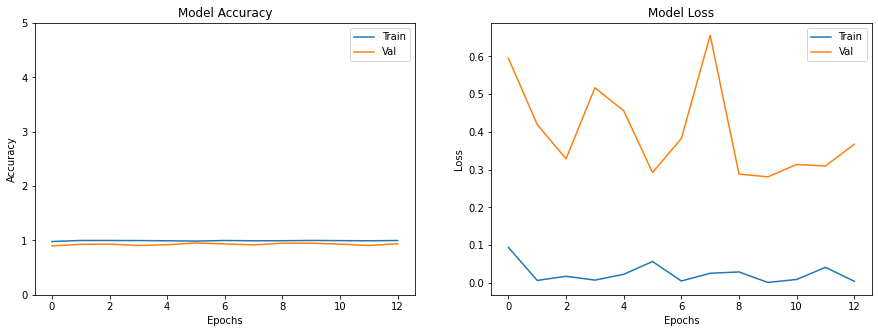

In [60]:
def plot_history(history):
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val')
  plt.title('Model Accuracy')
  plt.legend()
  plt.ylim([0, 5])

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'],label='Train')
  plt.plot(history.history['val_loss'],label='Val')
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()

plot_history(history)




# **Model evaluation**

**Test set**

In [47]:
val1_generator.reset()
pred=model.predict_generator(val1_generator,
verbose=1)

3/3 [==============================] - 5s 2s/step


In [0]:
predicted_class_indices=np.argmax(pred,axis=1)

In [0]:
labels = (train1_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [52]:
filenames=val1_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.head(10)
#results.to_csv("results.csv",index=False)

,Filename,Predictions
0,JFT_00001.jpg,10
1,JFT_00003.jpg,23
2,JFT_00006.jpg,10
3,JFT_00008.jpg,25
4,JFT_00018.jpg,3
5,JFT_00020.jpg,22
6,JFT_00024.jpg,6
7,JFT_00026.jpg,24
8,JFT_00050.jpg,20
9,JFT_00051.jpg,21
